<a href="https://colab.research.google.com/github/2bandito1/Fundamentals-of-AI-MiniProject1/blob/main/MiniProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# kaggle dataset

In [ ]:
! kaggle datasets download sakshigoyal7/credit-card-customers

Dataset URL: https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers
License(s): CC0-1.0
  0% 0.00/379k [00:00<?, ?B/s]
100% 379k/379k [00:00<00:00, 74.6MB/s]


In [ ]:
! unzip credit-card-customers.zip -d /content/credit-card-customers

Archive:  credit-card-customers.zip
  inflating: /content/credit-card-customers/BankChurners.csv  


# Import Packages

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

from imblearn.over_sampling import RandomOverSampler # type: ignore

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

dataSet = pd.read_csv("/content/credit-card-customers/BankChurners.csv")

# 1.2

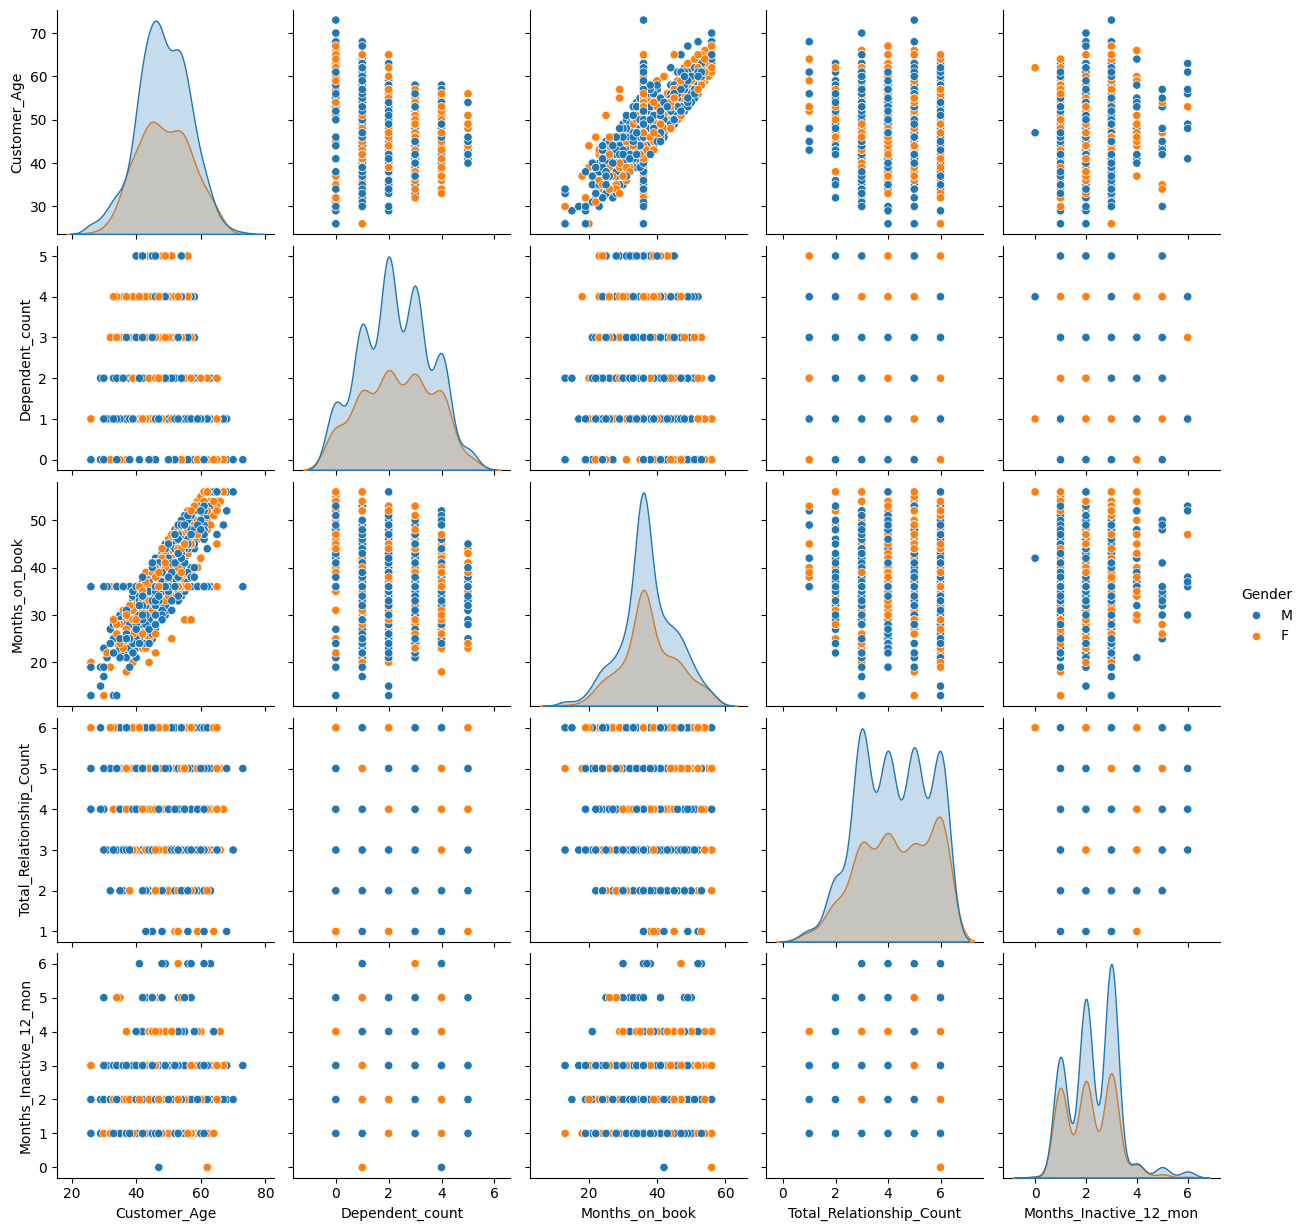

In [ ]:
sns.pairplot(dataSet.iloc[0:1000:, 1:12], hue = "Gender")
plt.show()

# 1.3

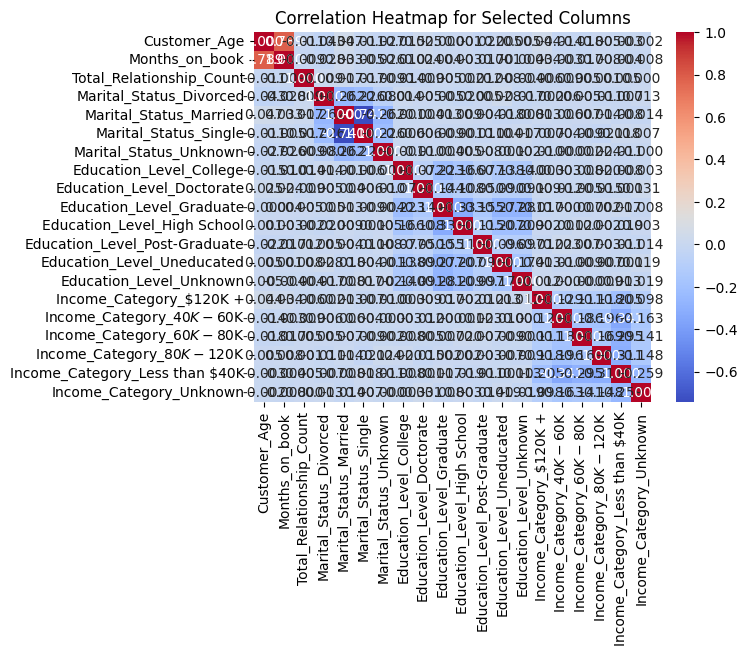

In [ ]:
HMdataSet = dataSet[['Marital_Status', 'Education_Level', 'Income_Category',
                     'Customer_Age', 'Months_on_book', 'Total_Relationship_Count']]

# Assign a value to the categorial data
HMdataSet = pd.get_dummies(HMdataSet)

corrMat = HMdataSet.corr()

# Plot the heatmap
sns.heatmap(corrMat, annot=True, cmap="coolwarm", fmt=".3f")
plt.title("Correlation Heatmap for Selected Columns")
plt.show()


# 1.4

In [ ]:
dataSet = dataSet.replace("Unknown", pd.NA)
dataSet = dataSet.dropna()
# NanCount = dataSet.isnull().sum()
# print(NanCount)

# 1.5

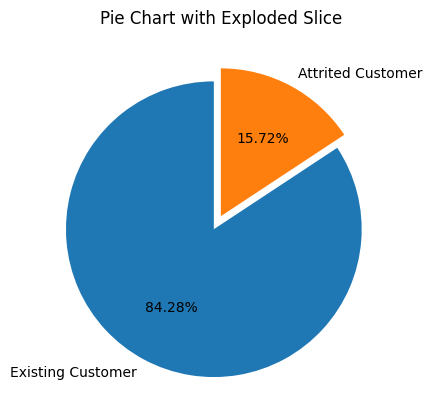

In [ ]:
#Count the "Existing Customer" and "Attrited Customer" flags
dataCount = dataSet['Attrition_Flag'].value_counts()

# Plot the pie plot
explode = [0.1, 0] # Explode visualization
dataCount.plot(kind="pie", autopct="%1.2f%%", startangle=90, labels=dataCount.index, explode=explode)
plt.title("Pie Chart with Exploded Slice")
plt.ylabel("")
plt.show()

# 1.6

In [ ]:
# # Separate features and target and drop the last 2 columns becuase of
# # the high correlation the 2 features have with the target
# y = dataSet["Attrition_Flag"]
# X = dataSet.drop(columns=["Attrition_Flag",
#                           "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2",
#                           "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1"])

# # Encode the categorial data
# encoder = LabelEncoder()

# X["Gender_enc"] = encoder.fit_transform(X["Gender"])
# X = X.drop(columns=["Gender"])
# X["Education_Level_enc"] = encoder.fit_transform(X["Education_Level"])
# X = X.drop(columns=["Education_Level"])
# X["Marital_Status_enc"] = encoder.fit_transform(X["Marital_Status"])
# X = X.drop(columns=["Marital_Status"])
# X["Income_Category_enc"] = encoder.fit_transform(X["Income_Category"])
# X = X.drop(columns=["Income_Category"])
# X["Card_Category_enc"] = encoder.fit_transform(X["Card_Category"])
# X = X.drop(columns=["Card_Category"])
# X = X.drop(columns=["Avg_Utilization_Ratio"])
# X = X.drop(columns=["Total_Ct_Chng_Q4_Q1"])

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Balance the data
# oversampler = RandomOverSampler(random_state=42)
# X_balanced, y_balanced = oversampler.fit_resample(X_train, y_train)

# # Train the model with both balanced and unbalanced data
# model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
# model.fit(X_train, y_train)

# model_balanced = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
# model_balanced.fit(X_balanced, y_balanced)

# # Predict and evaluate
# y_pred = model.predict(X_test)
# cm = confusion_matrix(y_test, y_pred)

# y_pred_balanced = model_balanced.predict(X_test)
# cm_balanced = confusion_matrix(y_test, y_pred_balanced)

# print("Unbalanced Confusion Matrix:\n\n", cm, "\n")
# print("Performance Report:\n\n", classification_report(y_test, y_pred))

# print("Balanced Confusion Matrix:\n\n", cm_balanced, "\n")
# print("Performance Report:\n\n", classification_report(y_test, y_pred_balanced))


# Bonus 1

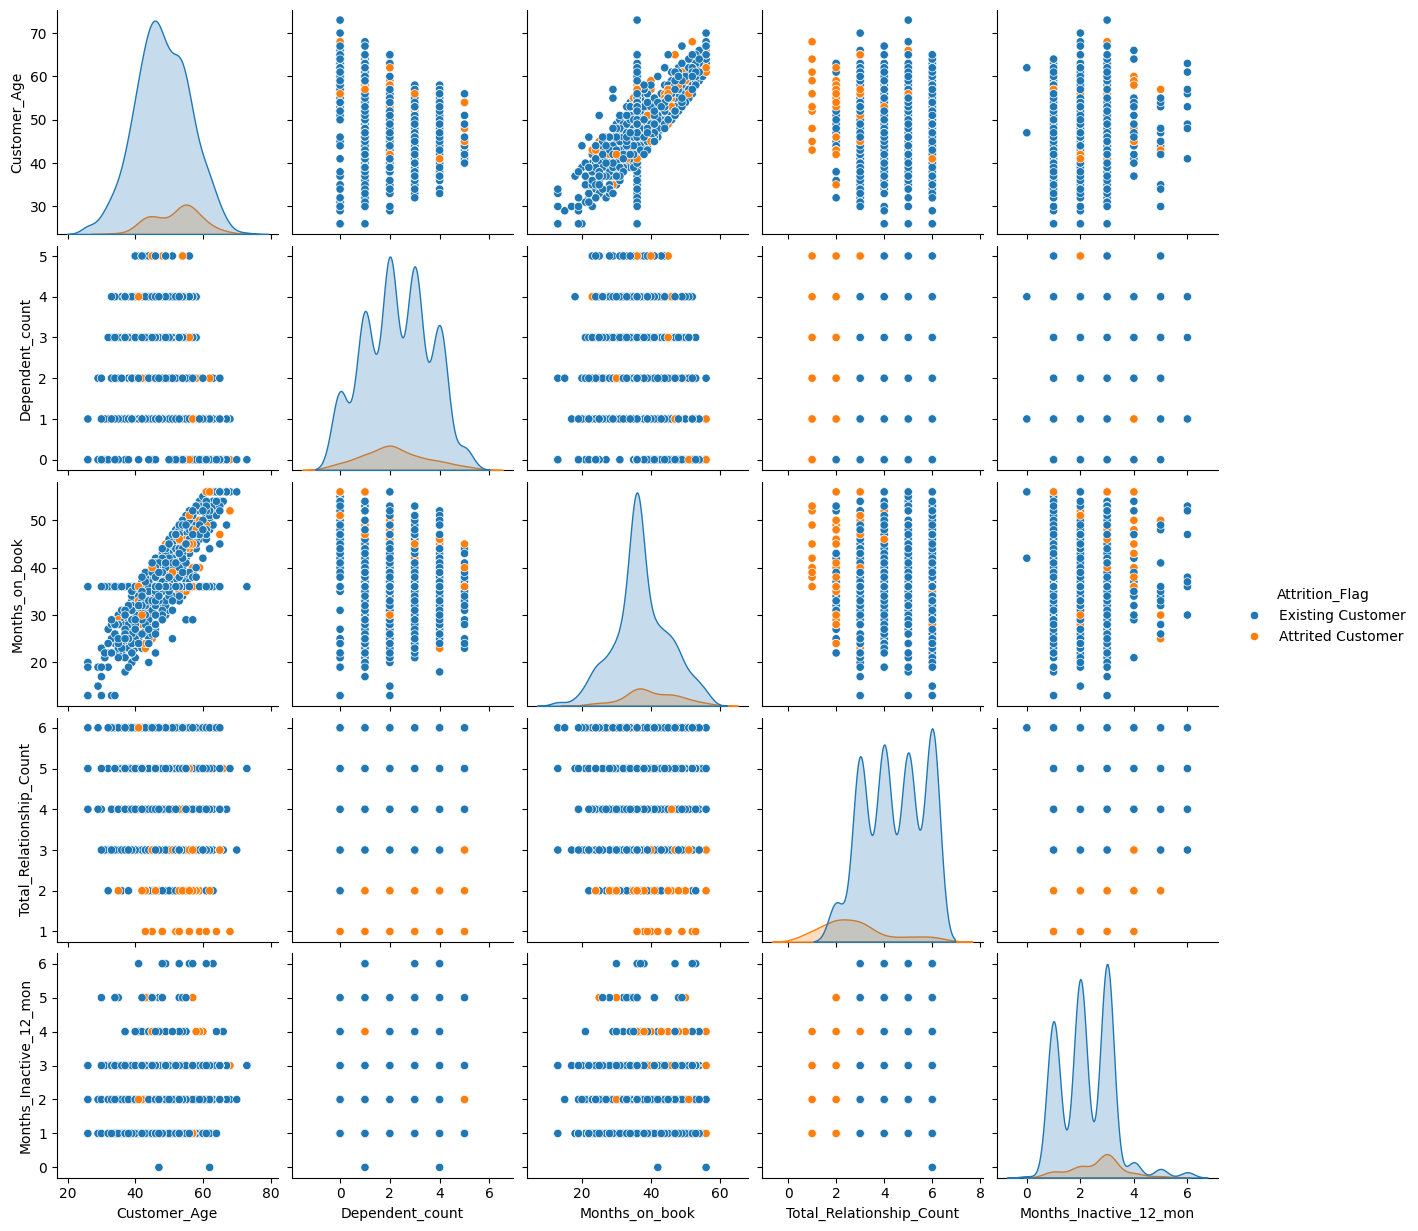

In [ ]:
sns.pairplot(dataSet.iloc[0:1000:, 1:12], hue = "Attrition_Flag")
plt.show()

# 2.1

In [ ]:
# # Load the data from data.npy
y = np.load('/content/data.npy')

# Generate x for the data
X = np.linspace(-0.5, 12.5, len(y))
# X = X.reshape(-1, 1) # 2d array is needed for 2.7

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.sort()

# plt.scatter(X_train, y_train, label = 'Train Data')
# plt.scatter(X_test, y_test, label = 'Test data')
# plt.legend()
# plt.show()


# 2.3

<ipython-input-94-2620e88e3a38>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[d] = z


MSE = 262.46412412520067
MAPE = 204.63138383231404
R2 = -0.7815365346108316
MAE = 13.340774851790457


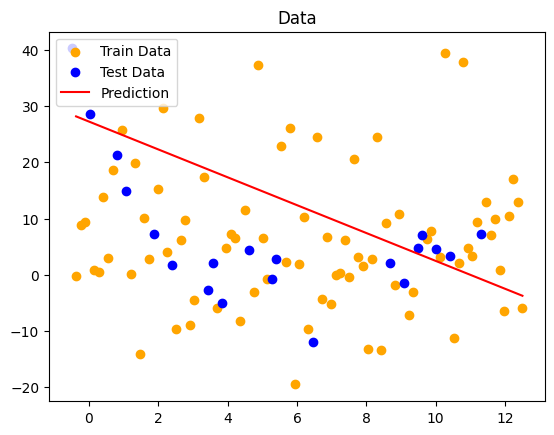

In [ ]:
LEARNING_RATE = 0.00005

# Initializing the line by randomly generating w and b
np.random.seed(69)
w = np.random.rand(1,1)*2 - 1
b = np.random.rand(1)*4 - 1

y_hat = np.zeros_like(y_train)

# Gradient Descendent loop
for i in range(1000):
    y_pred = np.zeros_like(y_train)

    for d in range(len(y_pred)):
        x = X_train[d]
        z = w*x + b
        y_pred[d] = z

    error = y_train - y_pred

    dj = np.dot(X_train.T, error)
    w += LEARNING_RATE*dj
    b += LEARNING_RATE*np.sum(y_train - y_hat)

# Calculating the MAE, MAPE, MSE and R2
mae = mean_absolute_error(y_train, y_pred)
mape = sum(((yi_train - yi_reg)/yi_train * 100)/len(y_train) for yi_train, yi_reg in zip(y_train, y_pred))
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f"MSE = {mse}\nMAPE = {mape}\nR2 = {r2}\nMAE = {mae}")

y_hat = y_hat.flatten()

plt.scatter(X_train, y_train, c = 'orange', label = 'Train Data')
plt.scatter(X_test, y_test, c = 'blue', label = 'Test Data')
plt.plot(X_train, y_pred, c = 'red', label = 'Prediction')
plt.title('Data')
plt.legend()
plt.show()

## 2.4

<ipython-input-106-379d790bde26>:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_hat_train[d] = z
<ipython-input-106-379d790bde26>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_hat_test[d] = z


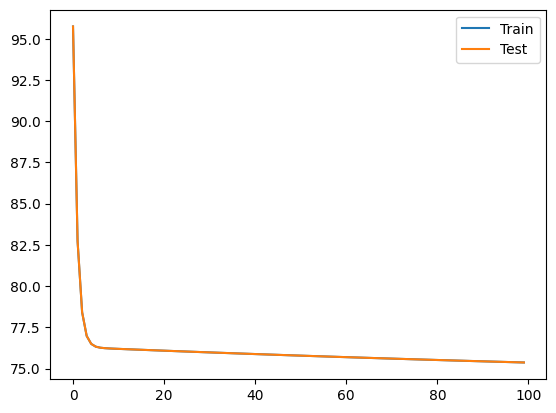

In [ ]:
LEARNING_RATE = 0.0001

np.random.seed(69)
w = np.random.rand(1, 1)*2 - 1
b = np.random.rand(1)*4 - 1

X_poly = np.vstack([X_train**i for i in range(1, 2)]).T

# Lists to store value of errors in every iteration (with respect to no. of trainings)
loss_func_train = []
loss_func_test = []


for i in range(100):
    y_hat_train = np.zeros_like(y_train)
    y_hat_test = np.zeros_like(y_test)

    y_pred = np.dot(X_poly, w) + b  # Linear combination of polynomial features

    # Calculating for train data
    for d in range(len(y_hat_train)):
        x = X_train[d]
        z = w*x + b
        y_hat_train[d] = z

    # Compute error
    error_train = y_train - y_hat_train
    J_train = 1/2 * np.dot(error_train, error_train)
    J_train *= 1/len(y_train)
    loss_func_train.append(J_train)

    # Calculating for test data
    for d in range(len(y_hat_test)):
        x = X_test[d]
        z = w*x + b
        y_hat_test[d] = z

    # Compute error
    error_test = y_test - y_hat_test
    J_test = 1/2 * np.dot(error_test, error_test)
    J_test *= 1/len(y_train)
    loss_func_test.append(J_test)


    # Compute gradients
    dj_w = -np.dot(X_poly.T, error_train)  # Gradient with respect to weights
    dj_b = -np.sum(error_train)            # Gradient with respect to bias

    # Update weights and bias
    w -= LEARNING_RATE * dj_w[:, None]
    b -= LEARNING_RATE * dj_b

y_pred = y_pred.flatten()

plt.plot(loss_func_train, label = 'Train')
plt.plot(loss_func_train, label = 'Test')
plt.legend()
plt.show()

# 2.6

[[ 2.40691007e+00]
 [ 2.29320264e+00]
 [ 2.20816753e+00]
 [ 2.10783907e+00]
 [ 2.08440815e+00]
 [ 2.07337437e+00]
 [ 2.07066896e+00]
 [ 2.07222312e+00]
 [ 2.07183500e+00]
 [ 2.03965969e+00]
 [ 2.00147987e+00]
 [ 1.94314688e+00]
 [ 1.86059194e+00]
 [ 1.74974625e+00]
 [ 1.42690748e+00]
 [ 1.20677683e+00]
 [ 9.42080266e-01]
 [ 2.62714279e-01]
 [-1.60092726e-01]
 [-6.43740792e-01]
 [-1.19229871e+00]
 [-1.80983527e+00]
 [-2.50041925e+00]
 [-3.26811946e+00]
 [-6.07460528e+00]
 [-8.40577140e+00]
 [-9.72161349e+00]
 [-1.11430533e+01]
 [-1.26741597e+01]
 [-1.43190014e+01]
 [-1.79661660e+01]
 [-1.99766264e+01]
 [-2.21170973e+01]
 [-2.43916474e+01]
 [-3.20604615e+01]
 [-3.49120167e+01]
 [-3.79179950e+01]
 [-4.10824654e+01]
 [-4.44094966e+01]
 [-4.79031574e+01]
 [-5.15675165e+01]
 [-5.94246051e+01]
 [-6.36254722e+01]
 [-6.80133127e+01]
 [-7.25921956e+01]
 [-7.73661896e+01]
 [-8.23393635e+01]
 [-8.75157861e+01]
 [-9.28995262e+01]
 [-9.84946526e+01]
 [-1.04305234e+02]
 [-1.10335339e+02]
 [-1.1658903

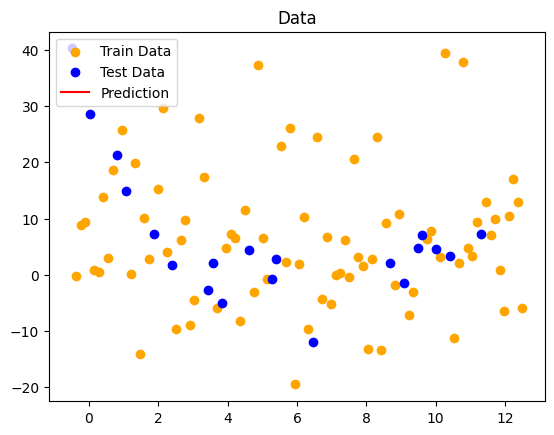

In [ ]:
LEARNING_RATE = 0.001
DEGREE = 3

np.random.seed(69)
w = np.random.rand(DEGREE,1)*2 - 1
b = np.random.rand(1)*4 - 1

X_poly = np.vstack([X_train**i for i in range(1, DEGREE + 1)]).T

for i in range(1000):
    y_pred = np.dot(X_poly, w) + b  # Linear combination of polynomial features

    if (i<20):
      print(y_pred)

    # Compute error
    error = y_pred.squeeze() - y_train

    # Compute gradients
    dj_w = -np.dot(X_poly.T, error)  # Gradient w.r.t. weights
    dj_b = -np.sum(error)            # Gradient w.r.t. bias

    # Update weights and bias
    w -= LEARNING_RATE * dj_w[:, None]
    b -= LEARNING_RATE * dj_b

y_pred = y_pred.flatten()

plt.scatter(X_train, y_train, c = 'orange', label = 'Train Data')
plt.scatter(X_test, y_test, c = 'blue', label = 'Test Data')
plt.plot(X_train, y_pred, c = 'red', label = 'Prediction')
plt.title('Data')
plt.legend()
plt.show()

# 2.7

In [ ]:
# Train the models
modelLinearRegression = LinearRegression()
modelLinearRegression.fit(X_train, y_train)

modelDecisionTree = DecisionTreeRegressor(random_state=42)
modelDecisionTree.fit(X_train, y_train)

modelRandomForest = RandomForestRegressor(random_state=42, n_estimators=10)
modelRandomForest.fit(X_train, y_train)

# Predict y using the models
y_pred_LinReg = modelLinearRegression.predict(X_test)
y_pred_DecTree = modelDecisionTree.predict(X_test)
y_pred_ForReg = modelRandomForest.predict(X_test)

# Calculating the errors for the trained models
mae = mean_absolute_error(y_test, y_pred_LinReg)
mse = mean_squared_error(y_test, y_pred_LinReg)
r2 = r2_score(y_test, y_pred_LinReg)
print(f"Errors for Linear Rergressor:\nMSE = {mse}\nR2 = {r2}\nMAE = {mae}")

mae = mean_absolute_error(y_test, y_pred_DecTree)
mse = mean_squared_error(y_test, y_pred_DecTree)
r2 = r2_score(y_test, y_pred_DecTree)
print(f"\nErrors for Decision Tree Regressor:\nMSE = {mse}\nR2 = {r2}\nMAE = {mae}")

mae = mean_absolute_error(y_test, y_pred_ForReg)
mse = mean_squared_error(y_test, y_pred_ForReg)
r2 = r2_score(y_test, y_pred_ForReg)
print(f"\nErrors for Random Forest Regressor:\nMSE = {mse}\nR2 = {r2}\nMAE = {mae}")


Errors for Linear Rergressor:
MSE = 110.59587101210086
R2 = 0.17829444391532445
MAE = 7.653499250826206

Errors for Decision Tree Regressor:
MSE = 16.378318346900286
R2 = 0.8783123179752432
MAE = 3.3553734487304894

Errors for Random Forest Regressor:
MSE = 11.409116190593874
R2 = 0.9152325120455821
MAE = 2.7610890230586866


## Bonus 2

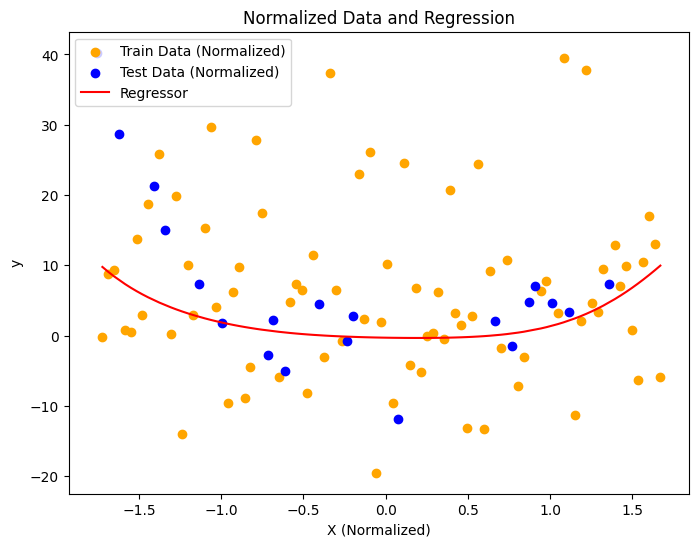

In [ ]:
# Load the data from data.npy
y = np.load('data.npy')

# Generate x for the data
X = np.linspace(-0.5, 12.5, len(y))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.sort()

# Hyperparameters
LEARNING_RATE = 0.0001
DEGREE = 7
EPOCHS = 1000

# Assuming X_train, y_train, X_test, and y_test are already defined
np.random.seed(69)

# Normalize X_train
X_mean = np.mean(X_train)
X_std = np.std(X_train)
X_train_norm = (X_train - X_mean) / X_std

# Normalize X_test using X_train's mean and std
X_test_norm = (X_test - X_mean) / X_std

# Generate polynomial features for training and testing
X_poly_train = np.vstack([X_train_norm**i for i in range(1, DEGREE + 1)]).T
X_poly_test = np.vstack([X_test_norm**i for i in range(1, DEGREE + 1)]).T

# Initialize weights and bias
w = np.random.rand(DEGREE, 1) * 2 - 1
b = np.random.rand(1) * 4 - 1

# Gradient descent loop
for i in range(EPOCHS):
    # Predict y_pred
    y_pred_train = np.dot(X_poly_train, w) + b  # Prediction for training data

    # Compute error
    error = y_pred_train.squeeze() - y_train

    # Compute gradients
    dj_w = np.dot(X_poly_train.T, error) / len(y_train)  # Normalize gradients
    dj_b = np.sum(error) / len(y_train)

    # Update weights and bias
    w -= LEARNING_RATE * dj_w[:, None]
    b -= LEARNING_RATE * dj_b

# Final predictions for training and test data
y_pred_train = np.dot(X_poly_train, w) + b
y_pred_test = np.dot(X_poly_test, w) + b

# Flatten predictions for plotting
y_pred_train = y_pred_train.flatten()
y_pred_test = y_pred_test.flatten()

# Plot training data, test data, and the regressor
plt.figure(figsize=(8, 6))

# Plot normalized training data and regressor
plt.scatter(X_train_norm, y_train, color='orange', label='Train Data (Normalized)')
plt.scatter(X_test_norm, y_test, color='blue', label='Test Data (Normalized)')
X_train_norm_sorted = np.sort(X_train_norm)  # Sort and convert to NumPy array
X_poly_sorted = np.vstack([X_train_norm_sorted**i for i in range(1, DEGREE + 1)]).T  # Create polynomial features
y_pred_sorted = np.dot(X_poly_sorted, w) + b  # Predict on sorted inputs
plt.plot(X_train_norm_sorted, y_pred_sorted, color='red', label='Regressor')  # Plot regressor

# Title and labels
plt.title('Normalized Data and Regression')
plt.xlabel('X (Normalized)')
plt.ylabel('y')
plt.legend()
plt.show()